In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/Datasets/Marathon/world_marathon_majors.csv", encoding='ISO-8859-1')

In [3]:
df.head(5)

,year,winner,gender,country,time,marathon
0,2018,Dickson Chumba,Male,Kenya,02:05:30,Tokyo
1,2018,Birhane Dibaba,Female,Ethiopia,02:19:51,Tokyo
2,2017,Wilson Kipsang,Male,Kenya,02:03:58,Tokyo
3,2017,Sarah Chepchirchir,Female,Kenya,02:19:47,Tokyo
4,2016,Feyisa Lilesa,Male,Ethiopia,02:06:56,Tokyo


In [4]:
df.shape  #Describes the dimensions of the dataframe

(536, 6)

In [5]:
df.dtypes  #Overview of the data types

year         int64
winner      object
gender      object
country     object
time        object
marathon    object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      536 non-null    int64 
 1   winner    536 non-null    object
 2   gender    536 non-null    object
 3   country   536 non-null    object
 4   time      536 non-null    object
 5   marathon  536 non-null    object
dtypes: int64(1), object(5)
memory usage: 25.3+ KB


# Marathon Wins by Country

In [7]:
df.country.value_counts()

Kenya             136
United States     104
Ethiopia           51
Germany            36
United Kingdom     35
Japan              22
Norway             20
Canada             17
Portugal           11
Mexico             10
Finland            10
Russia              8
Poland              8
Brazil              7
Italy               6
South Africa        5
Belgium             5
New Zealand         5
Morocco             5
Tanzania            4
South Korea         3
Ireland             3
Australia           3
Colombia            2
Denmark             2
Switzerland         2
Romania             2
Sweden              2
Greece              2
Spain               2
Latvia              2
China               1
Hungary             1
Eritrea             1
Guatemala           1
Yugoslavia          1
Soviet Union        1
Name: country, dtype: int64

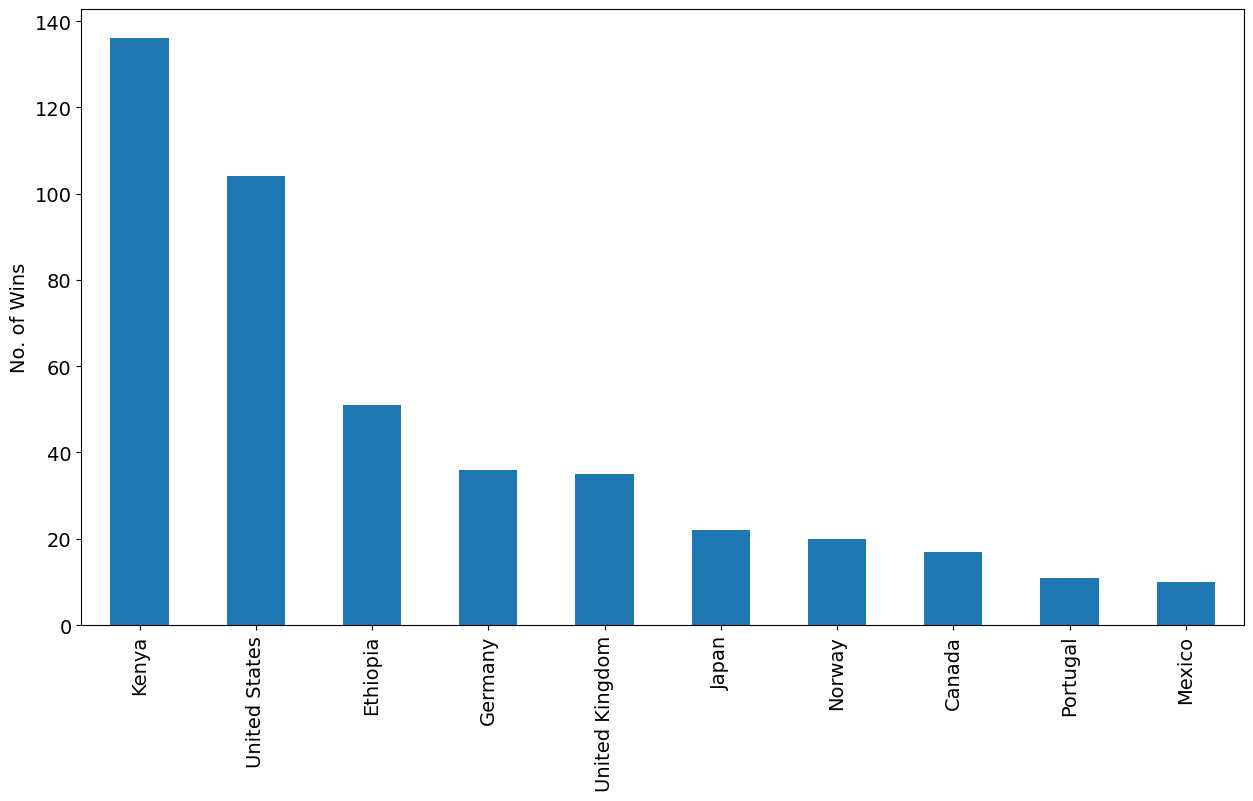

In [11]:
#We look at the top 10 countries in a bar graph
top_countries = df.country.value_counts().iloc[:10]
top_countries.plot(kind = "bar", figsize=(15,8), fontsize=14)
plt.ylabel("No. of Wins", fontsize=14)
plt.show()

# Using a For loop to look at the Top 3 Countries

In [12]:
# A look into the top three counties performance over the years
top_countries = df['country'].value_counts().nlargest(3).index

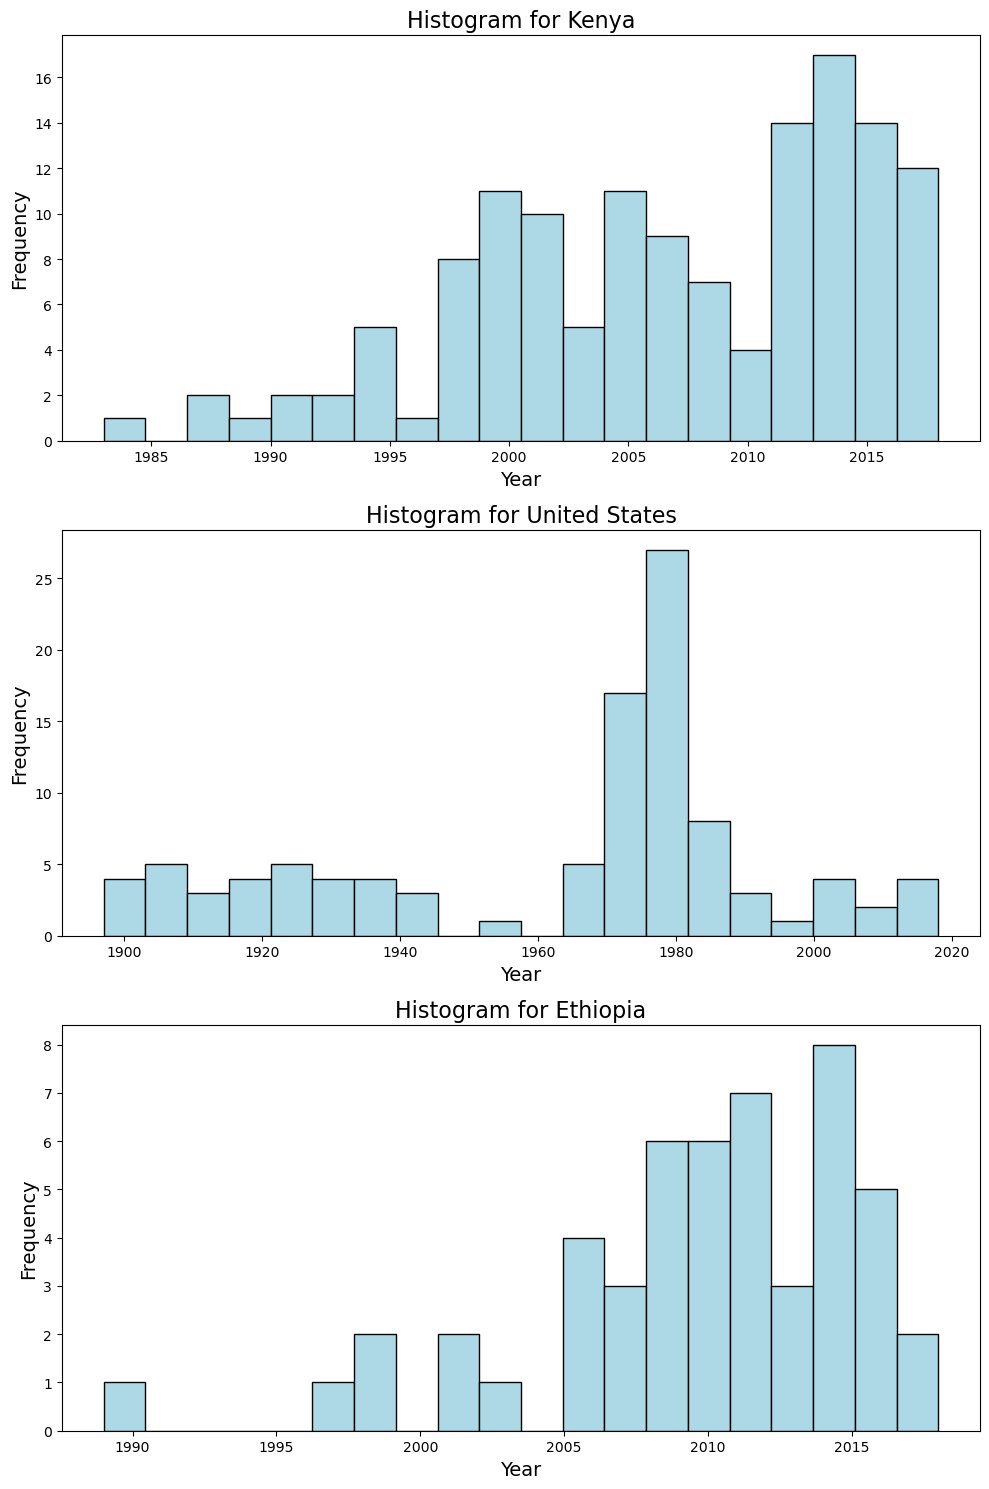

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
for i, country in enumerate(top_countries):
    country_data = df[df['country'] == country].sort_values('year')
    axs[i].hist(country_data['year'], bins=20, color='lightblue', edgecolor='black')
    axs[i].set_title(f'Histogram for {country}', fontsize=16)
    axs[i].set_xlabel('Year', fontsize=14)
    axs[i].set_ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

#The loop iterates through each country, filters the data, and plots a histogram for the 'year' column.
#The f-string embeds the value of the country variable into the string, creating a dynamic string with the name of the country.

In [14]:
#Post 2000 era has seen Kenya perform the best over the years

# Marathon Wins By Locations

In [ ]:
# How does the performance vary across different WMM locations
# Would the results still look the same for races dominated by Kenya, the US, etc. or can we observe more variance?

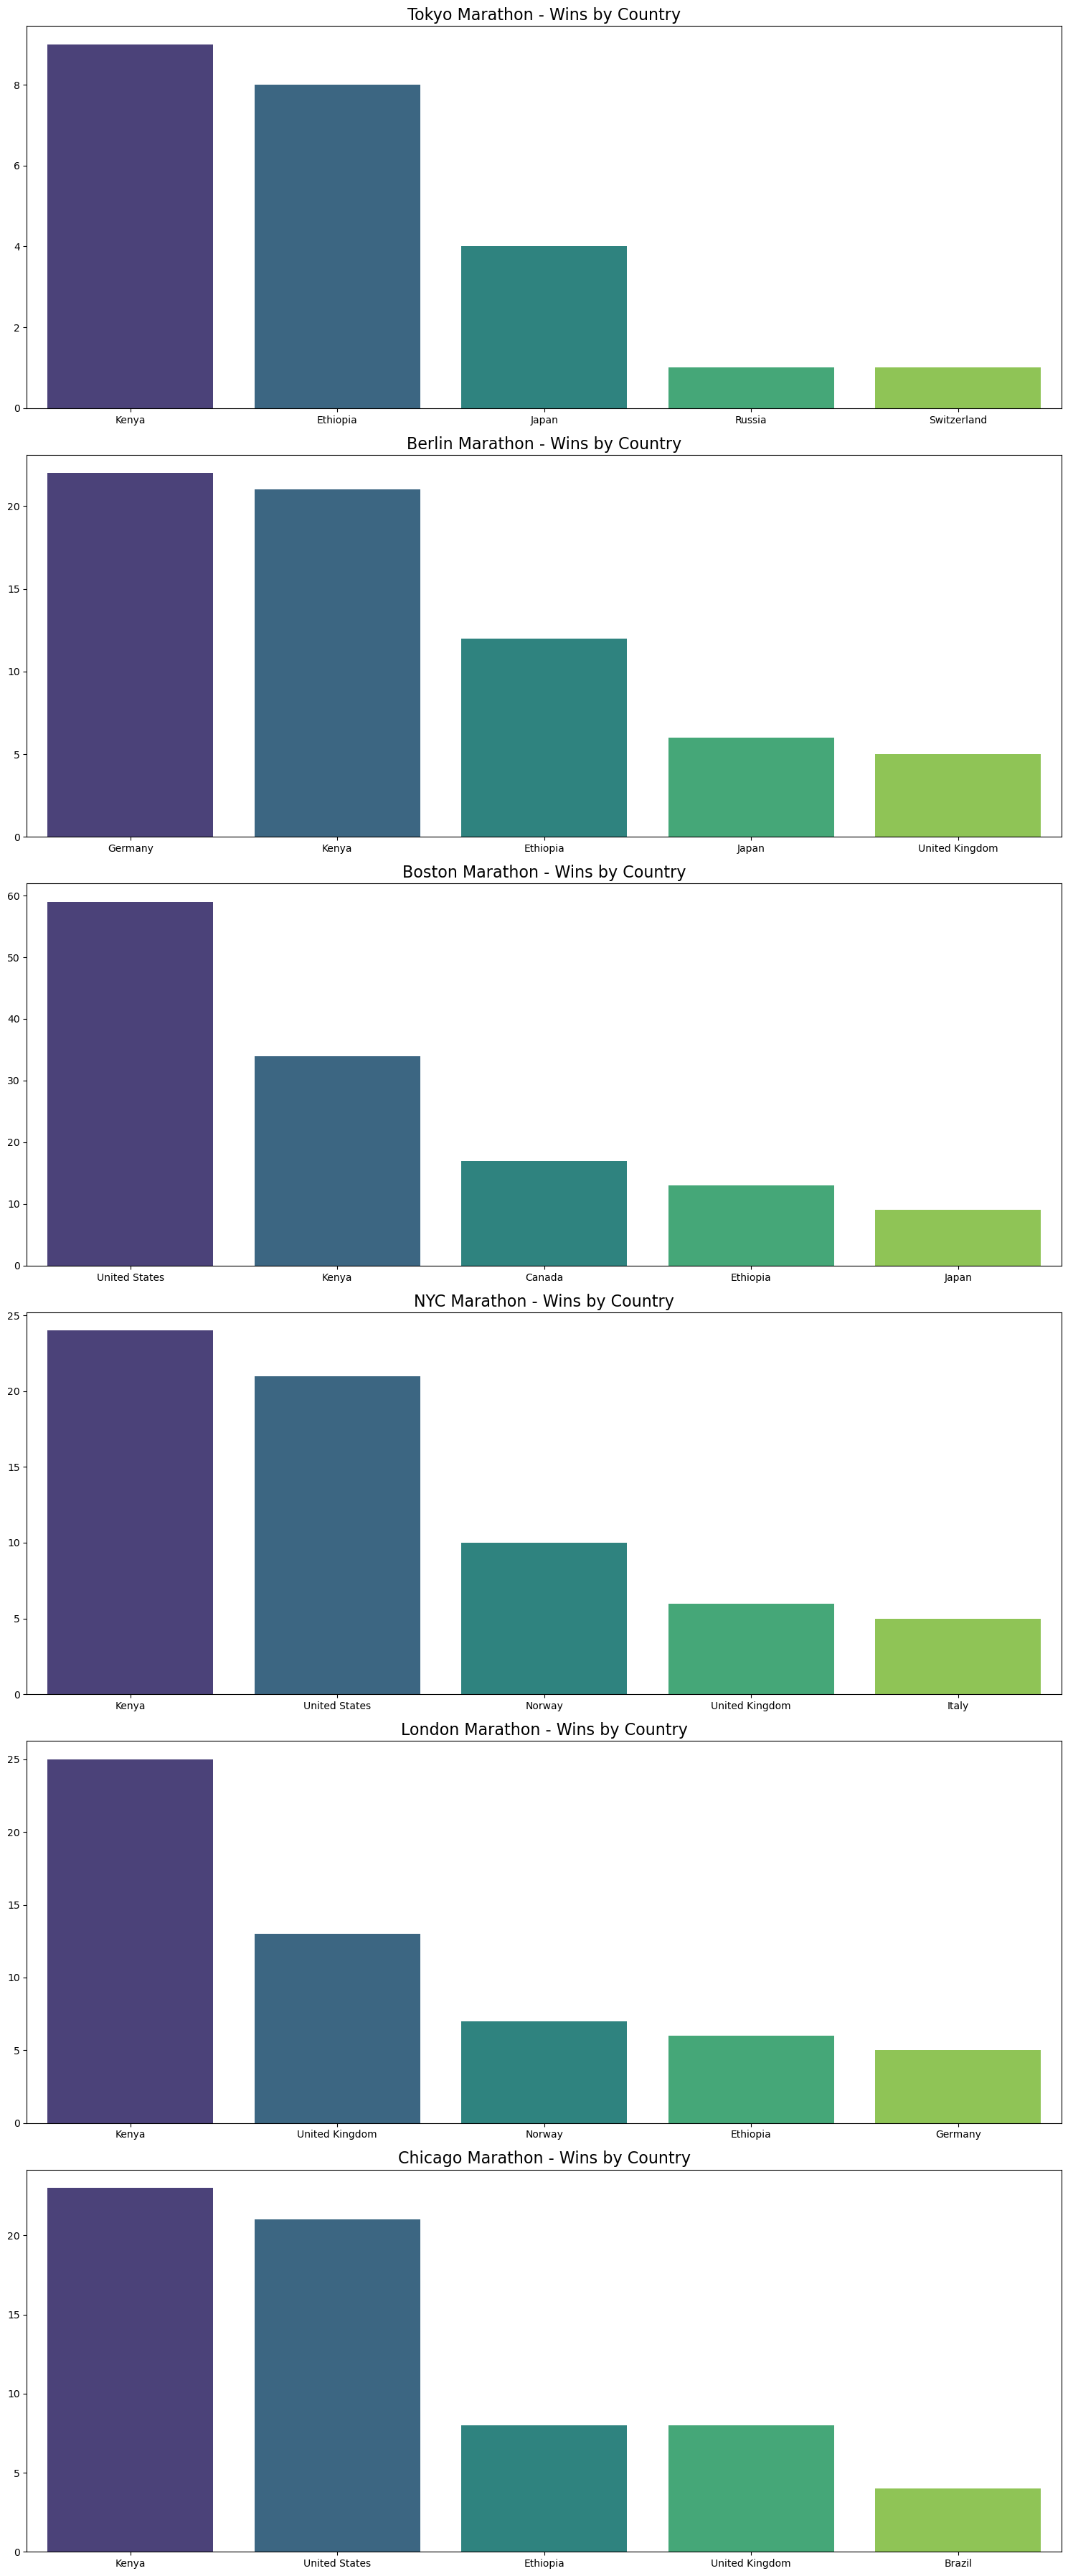

In [26]:
# List of unique marathon locations
marathon_locations = df['marathon'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=len(marathon_locations), figsize=(15, 6 * len(marathon_locations)))

# Loop through each marathon location
for i, location in enumerate(marathon_locations):
    # Filter DataFrame for the current location
    location_df = df.loc[df.marathon == location]
    
    # Count victories by country
    wins_by_country = location_df.country.value_counts().iloc[:5]
    
    # Plotting with seaborn
    sns.barplot(x=wins_by_country.index, y=wins_by_country.values, ax=axes[i], palette="viridis")
    
    axes[i].set_title(f"{location} Marathon - Wins by Country", fontsize=16)

plt.tight_layout()
plt.show()

# Best Perfoming Athlete(Top 10)

In [61]:
g_df = df.groupby("time")[["year", "winner", "country", "gender", "marathon"]].min()
g_df.head(10)

,year,winner,country,gender,marathon
time,,,,,
2024-01-08 02:02:57,2014,Dennis Kimetto,Kenya,Male,Berlin
2024-01-08 02:03:02,2011,Geoffrey Mutai,Kenya,Male,Boston
2024-01-08 02:03:03,2016,Kenenisa Bekele,Ethiopia,Male,Berlin
2024-01-08 02:03:05,2016,Eliud Kipchoge,Kenya,Male,London
2024-01-08 02:03:23,2013,Wilson Kipsang,Kenya,Male,Berlin
2024-01-08 02:03:32,2017,Eliud Kipchoge,Kenya,Male,Berlin
2024-01-08 02:03:38,2011,Patrick Musyoki,Kenya,Male,Berlin
2024-01-08 02:03:45,2013,Dennis Kimetto,Kenya,Male,Chicago
2024-01-08 02:03:58,2017,Wilson Kipsang,Kenya,Male,Tokyo


In [35]:
df[df["winner"]=='Dennis Kimetto']

,year,winner,gender,country,time,marathon,hours,minutes,seconds,formatted_time,second
10,2013,Dennis Kimetto,Male,Kenya,2024-01-08 02:06:50,Tokyo,2,6,50,2.06.50,7610
30,2014,Dennis Kimetto,Male,Kenya,2024-01-08 02:02:57,Berlin,2,2,57,2.02.57,7377
463,2013,Dennis Kimetto,Male,Kenya,2024-01-08 02:03:45,Chicago,2,3,45,2.03.45,7425


# Distribution By Gender

## Male Winners

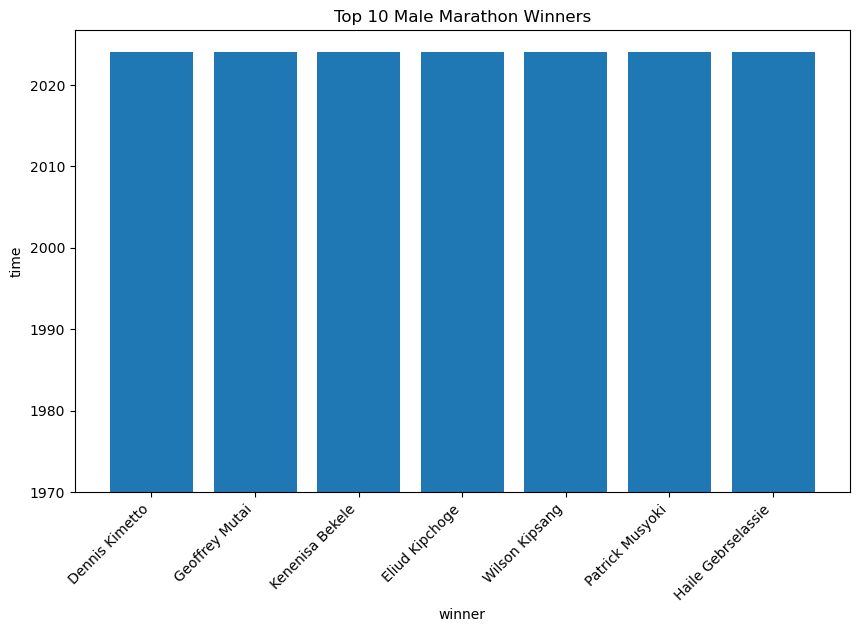

In [56]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# Filter only male winners
male_won = df[df['gender'] == 'Male']

# Sort by marathon time
male_top_10 = male_won.sort_values(by='time').head(10)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(male_top_10['winner'], male_top_10['time'])
plt.xlabel('winner')
plt.ylabel('time')
plt.title('Top 10 Male Marathon Winners')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [55]:
px.scatter(data_frame=male_won.sort_values('time'), 
y='time', x='year', color='marathon', 
hover_data=['winner'],title="Male Winners Time")

## Female Winners

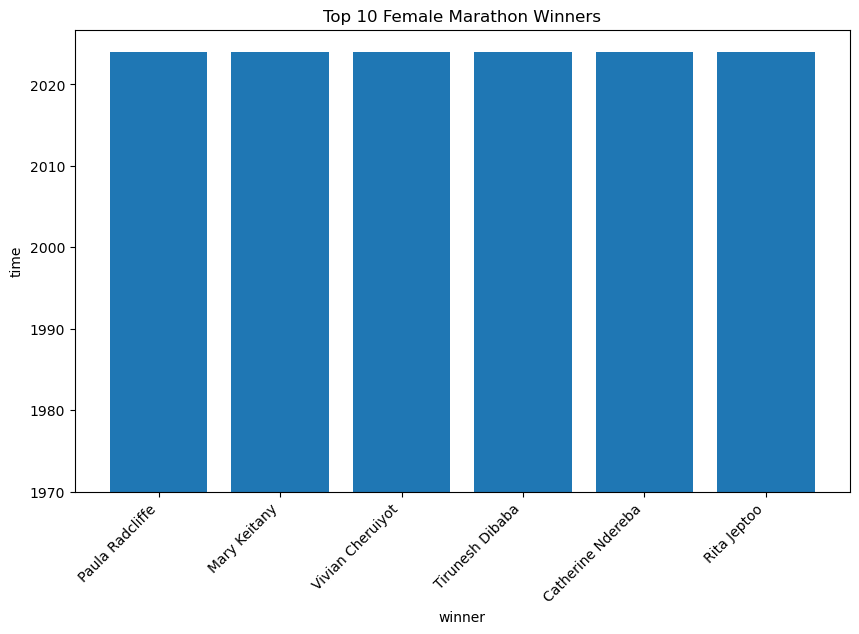

In [82]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# Filter only male winners
female_won = df[df['gender'] == 'Female']

# Sort by marathon time
female_top_10 = female_won.sort_values(by='time').head(10)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(female_top_10['winner'], female_top_10['time'])
plt.xlabel('winner')
plt.ylabel('time')
plt.title('Top 10 Female Marathon Winners')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [57]:
female_won = df[df['gender'] == 'Female'].reset_index(drop=True)
female_won.set_index(['year'])
px.scatter(data_frame=female_won, y='time', x='year', color='marathon', hover_data=['winner'], title="Female Winners Time")

In [91]:
df[df.year==2014]

,year,winner,gender,country,time,marathon,hours,minutes,seconds,formatted_time,second
8,2014,Dickson Chumba,Male,Kenya,2024-01-08 02:05:42,Tokyo,2,5,42,2.05.42,7542
9,2014,Tirfi Tsegaye,Female,Ethiopia,2024-01-08 02:22:23,Tokyo,2,22,23,2.22.23,8543
30,2014,Dennis Kimetto,Male,Kenya,2024-01-08 02:02:57,Berlin,2,2,57,2.02.57,7377
31,2014,Tirfi Tsegaye,Female,Ethiopia,2024-01-08 02:20:18,Berlin,2,20,18,2.20.18,8418
120,2014,Meb Keflezighi,Male,United States,2024-01-08 02:08:37,Boston,2,8,37,2.08.37,7717
121,2014,Rita Jeptoo,Female,Kenya,2024-01-08 02:18:57,Boston,2,18,57,2.18.57,8337
122,2014,Bizunesh Deba,Female,Ethiopia,2024-01-08 02:19:59,Boston,2,19,59,2.19.59,8399
293,2014,Wilson Kipsang,Male,Kenya,2024-01-08 02:10:59,NYC,2,10,59,2.10.59,7859
294,2014,Mary Keitany,Female,Kenya,2024-01-08 02:25:07,NYC,2,25,7,2.25.07,8707
386,2014,Wilson Kipsang,Male,Kenya,2024-01-08 02:04:29,London,2,4,29,2.04.29,7469


In [ ]:
# In 2014 Boston Marathon has 3 winners,a quick Google search shows Rita Jeptoo was disqualified for doping.

In [92]:
#We are dropping Rita Jeptoo from the list
df.drop(df[(df['winner'] == 'Rita Jeptoo') & (df['year'] == 2014)].index, inplace=True)
df[df['winner'] == 'Rita Jeptoo']

,year,winner,gender,country,time,marathon,hours,minutes,seconds,formatted_time,second
124,2013,Rita Jeptoo,Female,Kenya,2024-01-08 02:26:25,Boston,2,26,25,2.26.25,8785
138,2006,Rita Jeptoo,Female,Kenya,2024-01-08 02:23:38,Boston,2,23,38,2.23.38,8618
464,2013,Rita Jeptoo,Female,Kenya,2024-01-08 02:19:57,Chicago,2,19,57,2.19.57,8397


In [93]:
df[df.year==2014]

,year,winner,gender,country,time,marathon,hours,minutes,seconds,formatted_time,second
8,2014,Dickson Chumba,Male,Kenya,2024-01-08 02:05:42,Tokyo,2,5,42,2.05.42,7542
9,2014,Tirfi Tsegaye,Female,Ethiopia,2024-01-08 02:22:23,Tokyo,2,22,23,2.22.23,8543
30,2014,Dennis Kimetto,Male,Kenya,2024-01-08 02:02:57,Berlin,2,2,57,2.02.57,7377
31,2014,Tirfi Tsegaye,Female,Ethiopia,2024-01-08 02:20:18,Berlin,2,20,18,2.20.18,8418
120,2014,Meb Keflezighi,Male,United States,2024-01-08 02:08:37,Boston,2,8,37,2.08.37,7717
122,2014,Bizunesh Deba,Female,Ethiopia,2024-01-08 02:19:59,Boston,2,19,59,2.19.59,8399
293,2014,Wilson Kipsang,Male,Kenya,2024-01-08 02:10:59,NYC,2,10,59,2.10.59,7859
294,2014,Mary Keitany,Female,Kenya,2024-01-08 02:25:07,NYC,2,25,7,2.25.07,8707
386,2014,Wilson Kipsang,Male,Kenya,2024-01-08 02:04:29,London,2,4,29,2.04.29,7469
387,2014,Edna Kiplagat,Female,Kenya,2024-01-08 02:20:21,London,2,20,21,2.20.21,8421
